## Loading Data

In [198]:
import pandas as pd

csv_path_train = "../../data/loan-10k.lrn.csv"
csv_path_test = "../../data/loan-10k.tes.csv"

df_train = pd.read_csv(csv_path_train)
df_train.head()




,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C


In [199]:
df_test = pd.read_csv(csv_path_test)
df_test.head()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3582,10000.0,10000.0,10000.0,36 months,9.93,322.35,< 1 year,MORTGAGE,130000.0,...,Cash,N,9,2017,8,2006,2,2019,2,2019
1,60498,20000.0,20000.0,20000.0,60 months,13.67,461.96,10+ years,MORTGAGE,75500.0,...,Cash,N,3,2016,3,2002,0,2018,2,2019
2,53227,15000.0,15000.0,15000.0,36 months,11.80,496.79,< 1 year,RENT,38000.0,...,Cash,N,11,2018,9,2004,2,2019,2,2019
3,21333,12500.0,12500.0,12500.0,36 months,15.31,435.22,10+ years,MORTGAGE,65000.0,...,Cash,N,4,2013,10,1996,4,2016,2,2018
4,3885,19000.0,19000.0,19000.0,60 months,27.88,590.21,6 years,MORTGAGE,38000.0,...,Cash,N,10,2015,1,2001,4,2016,2,2019


## Preprocessing

Checking missing values

In [200]:
missing_counts = df_train.isna().sum()
print("Total missing values train:", int(missing_counts.sum()))

missing_counts = df_test.isna().sum()
print("Total missing values test:", int(missing_counts.sum()))

Total missing values train: 0
Total missing values test: 0


Encoding column grade to numerical values: A = 0, B = 1, C = 2, D = 3, E = 4

In [201]:
import numpy as np
import pandas as pd

vals = df_train['grade'].astype('string')
print([repr(v) for v in vals.unique().tolist()]) 

["'A'", "'E'", "'D'", "'C'", "'B'", "'G'", "'F'"]


In [202]:
import pandas as pd

clean = (df_train['grade']            
         .str.strip()                     
         .str.replace(r'["\']', '', regex=True) 
         .str.replace(r'\s+', '', regex=True)    
         .str.extract(r'([A-G])', expand=False)  
         .str.upper())

mapping = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
df_train['grade'] = clean.map(mapping)
df_train.head()


,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,0
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,4
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,3
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,2
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,2


Checking the distribution of the target grade

In [203]:
df_train["grade"].value_counts(), df_train["grade"].value_counts(normalize=True)

(grade
 2    2989
 1    2881
 0    1821
 3    1449
 4     621
 5     182
 6      57
 Name: count, dtype: int64,
 grade
 2    0.2989
 1    0.2881
 0    0.1821
 3    0.1449
 4    0.0621
 5    0.0182
 6    0.0057
 Name: proportion, dtype: float64)

Check what data types the attributes are

In [204]:
pd.set_option('display.max_rows', None)
df_train.dtypes


ID                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

In [205]:
pd.set_option('display.max_rows', None)
df_test.dtypes

ID                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

In [206]:
categorical_cols = [
    'term', 'emp_length', 'home_ownership', 'loan_status', 'pymnt_plan',
    'purpose', 'addr_state', 'initial_list_status', 'application_type',
    'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
    'verification_status'
]

for col in categorical_cols:
    train_vals = set(df_train[col].dropna().unique())
    test_vals = set(df_test[col].dropna().unique())

    print(f"\n{col}:")
    print(f"Train values {train_vals}")
    print(f"Test values {test_vals}")
    
    extra_in_test = test_vals - train_vals
    extra_in_train = train_vals - test_vals

    
    if extra_in_test:
        print(f"Values in TEST but not in TRAIN: {extra_in_test}")
    if extra_in_train:
        print(f"Values in TRAIN but not in TEST: {extra_in_train}")
    if not extra_in_test and not extra_in_train:
        print("Same categories in train & test")


term:
Train values {' 36 months', ' 60 months'}
Test values {' 36 months', ' 60 months'}
Same categories in train & test

emp_length:
Train values {'4 years', '< 1 year', '10+ years', '2 years', '9 years', '1 year', '6 years', '3 years', '5 years', '7 years', '8 years'}
Test values {'4 years', '< 1 year', '2 years', '10+ years', '9 years', '1 year', '6 years', '3 years', '5 years', '7 years', '8 years'}
Same categories in train & test

home_ownership:
Train values {'OTHER', 'MORTGAGE', 'ANY', 'OWN', 'RENT'}
Test values {'MORTGAGE', 'ANY', 'OWN', 'NONE', 'RENT'}
Values in TEST but not in TRAIN: {'NONE'}
Values in TRAIN but not in TEST: {'OTHER'}

loan_status:
Train values {'Fully Paid', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Current'}
Test values {'Fully Paid', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Charged Off', 'Current'}
Values in TEST but not in TRAIN: {'Default'}

pymnt_plan:
Train values {'n', 'y'}
Test val

Mapping y/n values to 1 and 0. Mapping emp_length ordinally. One-hot encoding the rest of the attributes with an object data types. 

In [207]:
import pandas as pd
import numpy as np

def norm_str(s):
    return (s.astype('string').str.normalize('NFKC').str.strip())

def preprocess(df, yn_cols, emp_map, cat_cols, target_col=None):
    df = df.copy()

    for c in yn_cols:
        if c in df.columns:
            df[c] = norm_str(df[c]).str.lower().map({'y':1,'n':0}).astype('Int64')

    if 'term' in df.columns:
        df['term'] = norm_str(df['term']).str.extract(r'(\d+)').astype('Int64')

    if 'emp_length' in df.columns:
        df['emp_length'] = norm_str(df['emp_length']).map(emp_map).astype('Int64')

    for c in cat_cols:
        if c in df.columns:
            df[c] = norm_str(df[c]).str.upper()

    cols_to_encode = [c for c in cat_cols if c in df.columns and c != target_col]

    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=False, dtype=int)

    return df


def align_train_test(train_df, test_df):
    all_cols = sorted(set(train_df.columns) | set(test_df.columns))
    train_df = train_df.reindex(columns=all_cols, fill_value=0)
    test_df = test_df.reindex(columns=all_cols, fill_value=0)

    return train_df, test_df


yn_cols = ["pymnt_plan","hardship_flag","debt_settlement_flag"]
emp_map = {"< 1 year":0,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,"6 years":6,
           "7 years":7,"8 years":8,"9 years":9,"10+ years":10}
cat_cols = ["home_ownership","loan_status","purpose","addr_state","initial_list_status",
            "application_type","disbursement_method","verification_status"]

train_processed = preprocess(df_train, yn_cols, emp_map, cat_cols, target_col="grade")
test_processed  = preprocess(df_test,  yn_cols, emp_map, cat_cols, target_col="grade")

train_encoded, test_encoded = align_train_test(train_processed, test_processed)

In [208]:
train_encoded.head()


,ID,acc_now_delinq,acc_open_past_24mths,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_NOT VERIFIED,verification_status_SOURCE VERIFIED,verification_status_VERIFIED
0,24341,0.0,12.0,0,0,0,0,0,0,0,...,325925.0,3092.350000,3092.35,542.69,0.0,2549.66,116200.0,1,0,0
1,67534,0.0,4.0,0,0,0,0,0,0,0,...,84967.0,36524.120000,36443.20,18016.77,0.0,18507.35,54100.0,0,1,0
2,35080,0.0,6.0,0,0,0,1,0,0,0,...,1446.0,10570.006607,10570.01,570.01,0.0,10000.00,10800.0,1,0,0
3,4828,0.0,9.0,0,0,0,0,1,0,0,...,9450.0,13659.760000,13659.76,3447.75,0.0,9048.85,33500.0,0,1,0
4,59259,0.0,4.0,0,0,0,0,0,0,0,...,10737.0,23343.990000,23343.99,5676.71,0.0,17667.28,45000.0,0,1,0


In [209]:
test_encoded.head()

,ID,acc_now_delinq,acc_open_past_24mths,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_NOT VERIFIED,verification_status_SOURCE VERIFIED,verification_status_VERIFIED
0,3582,0.0,4.0,0,0,0,0,0,0,0,...,19435.0,5468.920000,5468.92,1114.59,0.0,4354.33,28900.0,1,0,0
1,60498,0.0,4.0,0,0,0,0,0,0,0,...,62985.0,23984.471115,23984.47,3984.47,0.0,20000.00,25800.0,1,0,0
2,53227,0.0,0.0,0,0,0,0,0,0,0,...,0.0,1480.540000,1480.54,422.33,0.0,1058.21,12100.0,0,1,0
3,21333,0.0,0.0,0,0,0,0,0,0,0,...,56819.0,15667.766558,15667.77,3167.77,0.0,12500.00,12000.0,0,1,0
4,3885,0.0,7.0,0,0,0,0,0,1,0,...,39195.0,21704.040021,21704.04,2704.04,0.0,19000.00,21700.0,0,0,1


In [210]:
pd.set_option('display.max_rows', None)
test_encoded.dtypes


ID                                       int64
acc_now_delinq                         float64
acc_open_past_24mths                   float64
addr_state_AK                            int64
addr_state_AL                            int64
addr_state_AR                            int64
addr_state_AZ                            int64
addr_state_CA                            int64
addr_state_CO                            int64
addr_state_CT                            int64
addr_state_DC                            int64
addr_state_DE                            int64
addr_state_FL                            int64
addr_state_GA                            int64
addr_state_HI                            int64
addr_state_ID                            int64
addr_state_IL                            int64
addr_state_IN                            int64
addr_state_KS                            int64
addr_state_KY                            int64
addr_state_LA                            int64
addr_state_MA

In [211]:
pd.set_option('display.max_rows', None)
train_encoded.dtypes


ID                                       int64
acc_now_delinq                         float64
acc_open_past_24mths                   float64
addr_state_AK                            int64
addr_state_AL                            int64
addr_state_AR                            int64
addr_state_AZ                            int64
addr_state_CA                            int64
addr_state_CO                            int64
addr_state_CT                            int64
addr_state_DC                            int64
addr_state_DE                            int64
addr_state_FL                            int64
addr_state_GA                            int64
addr_state_HI                            int64
addr_state_ID                            int64
addr_state_IL                            int64
addr_state_IN                            int64
addr_state_KS                            int64
addr_state_KY                            int64
addr_state_LA                            int64
addr_state_MA

Stripping white spaces from col names

In [212]:

train_encoded.columns = train_encoded.columns.str.strip()
test_encoded.columns = test_encoded.columns.str.strip()



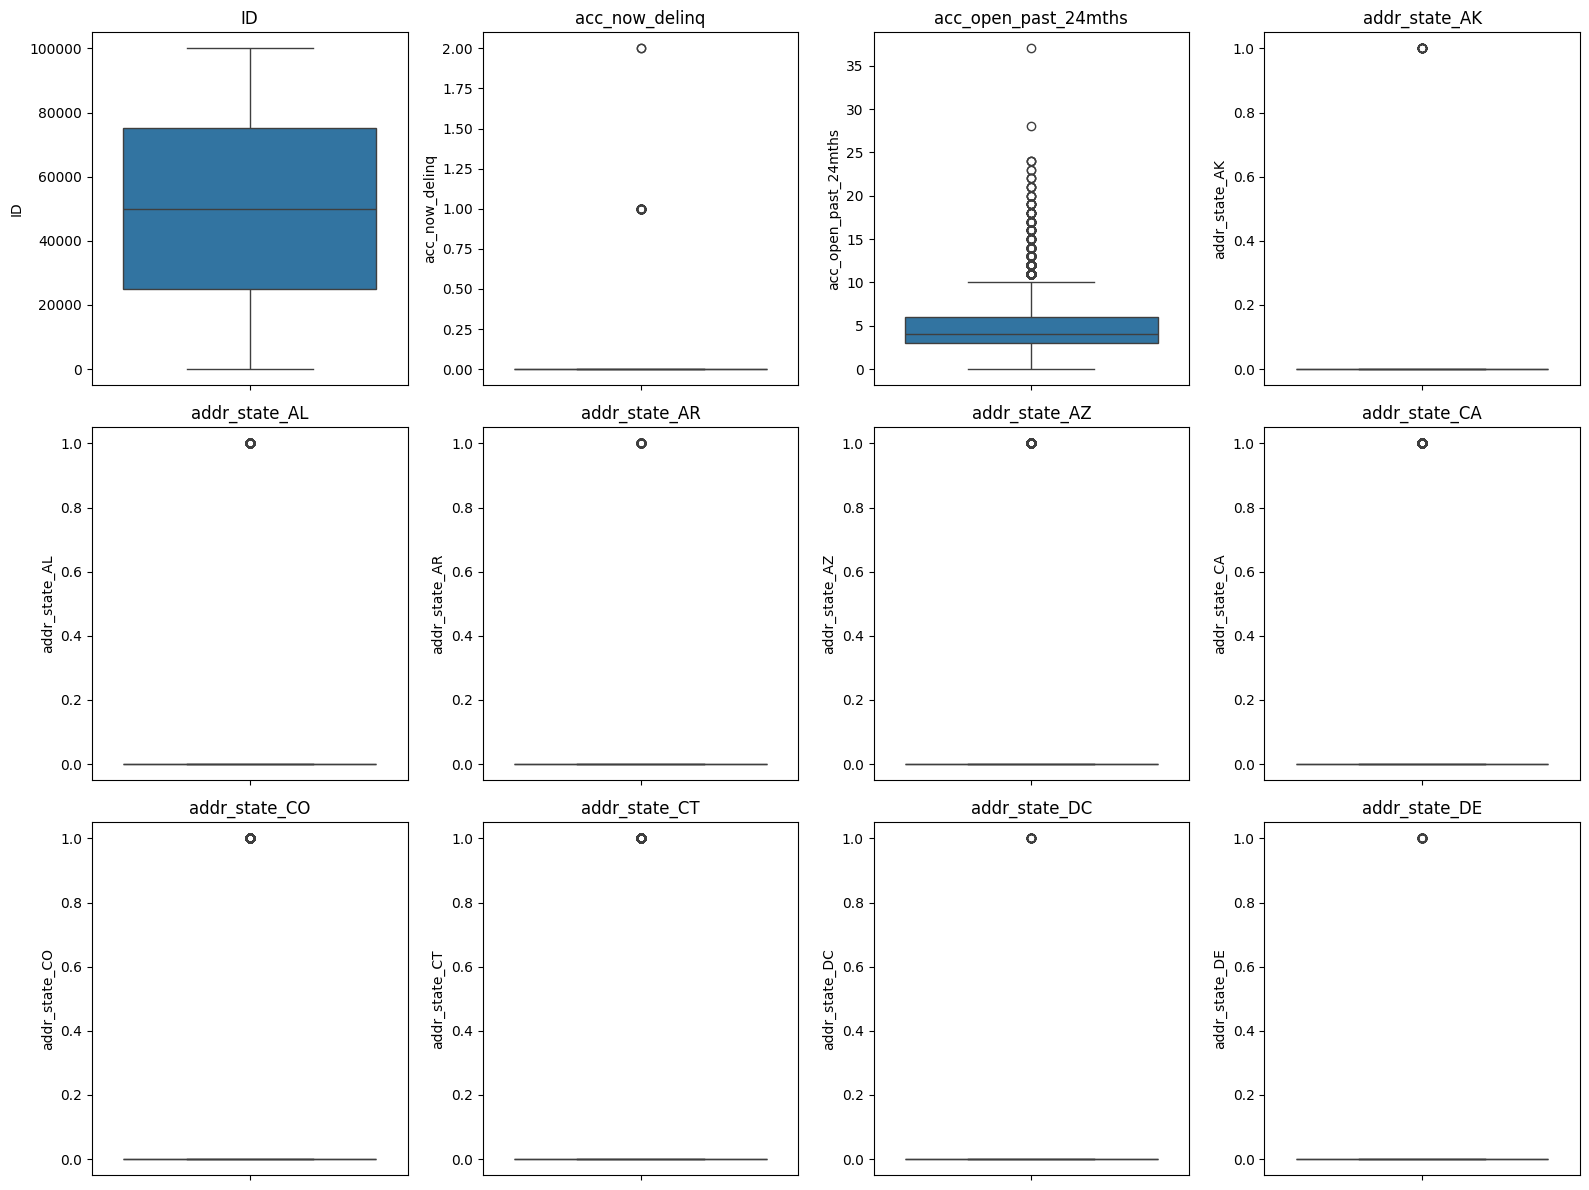

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = train_encoded.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=train_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Outlier handling

In [214]:
import numpy as np
import pandas as pd

def handle_outliers_train(df_encoded, target_col="grade"):
    feature_columns = [c for c in df_encoded.columns if c not in [target_col, "ID"]]
    df_wins = df_encoded.copy()
    caps = {}
    capped_counts = {}
    for col in feature_columns:
        q1 = df_wins[col].quantile(0.25)
        q3 = df_wins[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        arr = df_wins[col].to_numpy()
        caps[col] = (lower, upper)
        capped_counts[col] = int(((arr < lower) | (arr > upper)).sum())
        df_wins[col] = np.clip(arr, lower, upper)
    print("\nTotal values capped (train):", int(sum(capped_counts.values())))
    print("Top capped features (train):")
    for k in sorted(capped_counts, key=capped_counts.get, reverse=True)[:10]:
        print(f"  {k}: {capped_counts[k]}")
    return df_wins, caps, feature_columns

def handle_outliers_apply(df_encoded, caps):
    df_wins = df_encoded.copy()
    for col, (lower, upper) in caps.items():
        if col in df_wins.columns:
            arr = df_wins[col].to_numpy()
            df_wins[col] = np.clip(arr, lower, upper)
    return df_wins

train_winsorized, caps, feature_columns = handle_outliers_train(train_encoded, target_col="grade")
test_winsorized = handle_outliers_apply(test_encoded, caps)


Total values capped (train): 56935
Top capped features (train):
  last_credit_pull_d_month: 2646
  verification_status_VERIFIED: 2500
  num_accts_ever_120_pd: 2437
  purpose_CREDIT_CARD: 2250
  delinq_2yrs: 1894
  pub_rec: 1585
  tot_coll_amt: 1555
  last_pymnt_amnt: 1357
  addr_state_CA: 1342
  pub_rec_bankruptcies: 1169


## Scaling

In [215]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

train_scaled = train_winsorized.copy()
train_scaled[feature_columns] = robust_scaler.fit_transform(train_winsorized[feature_columns])

test_scaled = test_winsorized.copy()
test_scaled[feature_columns] = robust_scaler.transform(test_winsorized[feature_columns])

print("Scaled features shape:", train_scaled[feature_columns].shape)
train_scaled.head()



Scaled features shape: (10000, 167)


,ID,acc_now_delinq,acc_open_past_24mths,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_NOT VERIFIED,verification_status_SOURCE VERIFIED,verification_status_VERIFIED
0,24341,0.0,2.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.104380,-0.527014,-0.526572,-0.432749,0.0,-0.420072,2.119371,1.0,0.0,0.0
1,67534,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.085484,2.102354,2.098620,2.153496,0.0,1.021409,0.934579,0.0,1.0,0.0
2,35080,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.786376,0.061631,0.062027,-0.421922,0.0,0.252928,-0.536958,1.0,0.0,0.0
3,4828,0.0,1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.606991,0.304858,0.305235,0.718513,0.0,0.167009,0.234494,0.0,1.0,0.0
4,59259,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.578147,1.067206,1.067524,1.601840,0.0,0.945524,0.625319,0.0,1.0,0.0


In [216]:
print("Scaled features shape:", test_scaled[feature_columns].shape)
test_scaled.head()

Scaled features shape: (10000, 167)


,ID,acc_now_delinq,acc_open_past_24mths,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_NOT VERIFIED,verification_status_SOURCE VERIFIED,verification_status_VERIFIED
0,3582,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.383209,-0.339929,-0.339502,-0.206107,0.0,-0.257053,0.078165,1.0,0.0,0.0
1,60498,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.592827,1.117625,1.117939,0.931213,0.0,1.156242,-0.027188,1.0,0.0,0.0
2,53227,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.818783,-0.653897,-0.653445,-0.480447,0.0,-0.554796,-0.492778,0.0,1.0,0.0
3,21333,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454636,0.462930,0.463294,0.607559,0.0,0.478756,-0.496177,0.0,1.0,0.0
4,3885,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059649,0.938109,0.938436,0.423784,0.0,1.065911,-0.166525,0.0,0.0,4.0


In [217]:
test_scaled.drop(columns=["grade"], inplace=True)

## Encode the solution file

In [218]:
csv_path_sol = "../../data/loan-10k.sol.ex.csv"
df_sol = pd.read_csv(csv_path_sol)

clean = (df_sol['grade']            
         .str.strip()                     
         .str.replace(r'["\']', '', regex=True) 
         .str.replace(r'\s+', '', regex=True)    
         .str.extract(r'([A-G])', expand=False)  
         .str.upper())

mapping = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
df_sol['grade'] = clean.map(mapping)

Create new CSV file with processed training data


In [219]:
output_path_train = "../../data/loan-10k-preprocessed-train.csv"
train_scaled.to_csv(output_path_train, index=False)

output_path_test= "../../data/loan-10k-preprocessed-test.csv"
test_scaled.to_csv(output_path_test, index=False)

output_path_sol= "../../data/loan-10k-preprocessed-sol.csv"
df_sol.to_csv(output_path_sol, index=False)
